# 사이킷런으로 구현해 보는 머신러닝

## 머신러닝 알고리즘

### 머신러닝의 알고리즘 종류
  - 지도학습(Supervised Learning)
  - 비지도학습(Unsupervised Learning)
  - 강화학습(Reinforcement Learning)

1. 지도학습에 속하는 대표적인 알고리즘
  - 분류(Classification) : 예측해야할 데이터가 범주형(categorical) 변수일때 분류라고 함
  - 회귀(Regression) : 예측해야할 데이터가 연속적인 값 일때 회기라고 함
  - 예측(Forecastion) : 과거 및 현재 데이터를 기반으로 미래를 예측하는 과정 / 예를 들면 올해와 전년도 매출을 기반으로 내년도 매출을 추산하는 것
  

2. 비지도학습에 속하는 대표적인 알고리즘
  - 클러스터링 : 특정 기준에 따라 유사한 데이터끼리 그룹화함
  - 차원축소 : 고려해야할 변수를 줄이는 작업, 변수와 대상간 진정한 관계를 도출하기에 용이


3. 강화학습에 기본적으로 사용되는 용어 및 대표적인 알고리즘 종류
  - 에이전트(Agent) : 학습 주체(actor, controller)
  - 환경(Environment) : 에이전트에게 주어진 환경, 상황, 조건
  - 행동(Action) : 환경으로부터 주어진 정보를 바탕으로 에이전트가 판단한 행동
  - 보상(Reward) : 행동에 대한 보상을 머신러닝 엔지니어가 설계
  - Monte Carlo methods
  - Q-Learning
  - Policy Gradent Methods

### 사이킷런에서 사용하는 머신러닝 알고리즘

  - 사이킷런에서 사용하는 알고리즘 Task는 4가지로 Classification, Regression, Clustering, Dimensionality Reduction 이다.
  - 사이킷런은 알고리즘을 데이터 수량, 라벨의 유무(정답 유무), 데이터 종류의 3가지 기준에 따라서 나눈다.

1. Classification 알고리즘
  - SGD Classifier
  - KNeighborsClassifier
  - LinearSVC
  - NaiveBayes
  - Kernel approximation
  - EnsenbleClassifiers
  
  
2. Regression 알고리즘
  - SGD Regressor
  - Lasso
  - ElasticNet
  - RidgeRegression
  - SVR(kernel='linear')
  - SVF(kernel='rbf')
  - EnsenbleRegressor

### 사이킷런 설치 및 셋팅

  - 사이킷런 설치는 pip install scikit-learn 명령어를 사용해서 설치할 수 있다.

In [2]:
import sklearn # import 된 사이킷런의 버전을 확인할 수 있다.

print(sklearn.__version__)

1.0


### 사이킷런의 주요 모듈과 데이터 표현법

  - 사이킷런의 알고리즘은 파이썬 클래스로 구현되어 있고 데이터셋은 Numpy의 ndarray, pandas의 DataFrame, Scipy의 Sparse Matrix를 이용할 수 있다.
  - 훈련과 예측 등 머신러닝 모델을 다룰 때는 CoreAPI라고 불리는 fit(), transfomer(), predict() 와 같은 함수를 이용한다.
  - 사이킷런에서 주로 사용하는 API 종류
  
  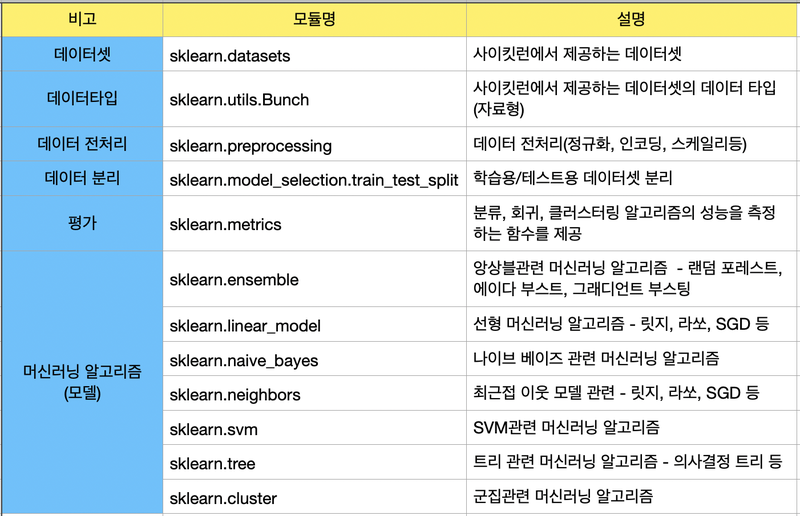

  - 사이킷런에서는 데이터 표현 방식을 보통 2가지로 나타낸다.
  - 특성 행렬(Feature Matrix) / 타겟 벡터(Target Vector)
      
      1. 특성 행렬(Feature Matrix)
          
          - 입력 데이터를 의미한다.
          - 특성(feature) : 데이터에서 수치 값, 이산 값, 불리언 값으로 표현되는 개별 관측치를 의미한다. 특성 행렬에서는 열에 해당하는 값이다.
          - 표본(sample) : 각 입력 데이터, 특성 행렬에서는 행에 해당하는 값이다.
          - n_sample : 행의 개수(표본의 개수)
          - n_feature : 열의 개수(특성의 개수)
          - x : 통상 특성 행렬은 변수명 x로 표기한다.
          - [n_samples, n_features]는 [행,열] 형태의 2차원 배열 구조를 사용하며 ndarray와 DataFrame, Sparse Matrix를 사용할 수 있다.
          
      
      2. 타겟 백터(Target Vector)
      
          - 입력 데이터의 라벨(정답)을 의미한다.
          - 목표(Target): 라벨, 타겟값, 목표값이라고도 부르며 특성 행렬로부터 예측하고자 하는 것을 말한다.
          - n_sample : 벡터의 길이(라벨의 개수)
          - 타겟 벡터에서 n_features 는 없다.
          - y : 통상 타겟 벡터는 변수명 y로 표기한다.
          - 타겟 벡터는 보통 1차원 벡터로 나타내며 ndarray와 Series를 사용해서 나타낼 수 있다.
          
      
      3. 특성행렬 x의 n_samples와 타겟백터 y의 n_samples 는 동일해야 한다.

### 사이킷런 주요 모듈 / 회귀 모델 실습

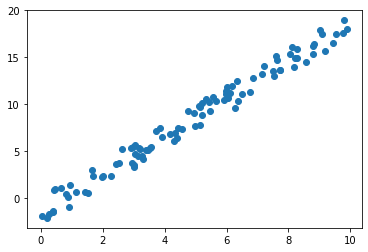

In [3]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x -3 * r.rand(100)
plt.scatter(x,y)

In [5]:
# 입력데이터 x 모양

x.shape


(100,)

In [6]:
# 정답데이터 y 모양

y.shape

(100,)

In [8]:
# 사이킷런에서 사용할 머신러닝 모델 생성 - LinearRegression 모델 사용

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model   # 모델 생성이 잘 되었는지 확인하는 과정

LinearRegression()

In [10]:
# 모델 훈련시키기 - fit()메서드를 이용해서 모델 훈련
# 입력데이터 x를 행렬로 바꿔 주어야 한다. x는 numpy의 ndarray 타입이기 때문에 reshape()을 사용해서 바꿔준다.

X = x.reshape(100,1)

# 바뀐 데이터를 사용해서 fit()의 인자로 넣어준다.
model.fit(X,y)

LinearRegression()

In [12]:
# 훈련이 끝난 모델에 새로운 데이터를 넣고 예측하기
# 새로운 데이터는 np.linspace()를 이용해서 생성한다.
# 예측 메서드는 predict()를 사용해서 인자를 넣어준다. / predict()도 인자를 행렬로 넣어주어야 한다.

x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)  # predict에 넣을 인자를 행렬로 바꿔주는 과정
y_new = model.predict(X_new)

In [13]:
# 모델이 잘 예측했는지 성능을 평가하기
# 성능 평가 모델은 sklearn.metrics에 저장되어 있는 RMSE를 사용해서 평가한다.

from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y,y_new))

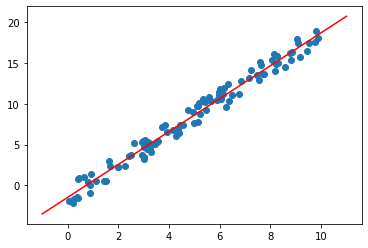

In [15]:
# 직관적으로 확인해보기 위해서 그래프로 그려본다.

plt.scatter(x, y, label='intup data')
plt.plot(X_new, y_new, color='red', label='regression line')

### 사이킷런 주요 모듈 / datasets 모듈

  - sklearn.datasets 모듈은 dataset loaders와 dataset fetchers로 나뉜다.
  - dataset loaders는 Toy dataset을 제공하고 dataset fetchers는 Real World dataset을 제공한다.
  - 여기서는 Toy dataset을 다뤄본다.
  - Toy dataset이 제공하는 예시는 다음과 같다.
   1. dataset.load_boston() : 회귀문제, 미국 보스턴 집값 예측
   2. dataset.load_breast_cancer() : 분류문제, 유방암 판별
   3. dataset.load_digits() : 분류문제, 0~9 숫자 분류
   4. dataset.load_iris() : 분류문제, iris 품종 분류
   5. dataset.load_wine() : 분류문제, 와인분류

In [1]:
# dataset.load_wine()을 사용

from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils.Bunch

In [2]:
# keys()를 사용하면 데이터에 키 값이 무엇무엇 있는지 알 수 있다.
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
data.data
# 특수행렬은 2차원이며 행에는 데이터의 개수(n_samples), 열에는 특성의 개수(n_features)가 들어있다.

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
data.data.shape
# 특성이 13개, 데이터가 178개인 것을 알 수 있다.

(178, 13)

In [5]:
data.target
# target은 벡터값을 의미한다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
data.feature_names
# freature_names를 이용해서 특성의 이름들을 알 수 있다.

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
len(data.feature_names)
# 특성이 아까 13개라고 했기 때문에 개수를 확인해보면 13이 나온다.

13

In [9]:
data.target_names
# target_name은 분류하고자 하는 대상이다.
# 여기서는 총 3개의 분류 대상이 나온다.

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
print(data.DESCR)
# DESCR은 describe의 약자로 데이터에 대한 설명을 보여준다.

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [11]:
# 좀 더 쉽게 보기 위해서 Pandas의 DataFrame을 사용해서 나타낼 수 있다.
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
# 머신러닝 모델 만들기
# 특성 행렬은 x에 저장하고 타겟 백터는 y에 저장한다.

x = data.data
y = data.target

# 분류 문제이기 때문에 RandomForestClassifier를 사용해서 실행한다.
# 다른 분류 모델을 사용해도 무방하다.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# 훈련은 fit() 메서드를 사용해서 실행한다.
model.fit(x,y)

# 예측은 .predict를 사용한다.
y_pred = model.predict(x)

In [15]:
# 성능평가

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

print("accuracy =", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy = 1.0


  - 정확도가 모두 1이 나온것을 확인할 수 있다.
  - 그 이유는 학습 데이터와 테스트 데이터가 같기 때문에 똑같은것을 분류하다보니 정확도가 100%가 나온 것이다.

In [27]:
# 학습 데이터와 테스트 데이터 분리하기
# 보통 8:2 비율로 데이터를 나눠준다.
# train_test_split() 을 사용하면 편하게 분리할 수 있다.

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2,)

print(len(X_train), len(X_test))

142 36


In [43]:
data = load_wine()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=24)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy =", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

accuracy = 0.9722222222222222


  - 데이터를 섞어준 뒤 다시 평가 했을 때 0.97의 정확도를 얻을 수 있었다.
  - 수치 조정에 따라서 결과값이 바뀔 수 있다.